In [ ]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama


models_folder = "./models"
model_name = "TheBloke/Llama-2-13B-Chat-GGML"
file_name = "llama-2-13b-chat.ggmlv3.q4_K_M.bin"

file_path = hf_hub_download(repo_id=model_name, filename=file_name, local_dir=models_folder)
model = Llama(file_path, n_ctx=4096)


In [ ]:
history = [[""], ""]
history[0][0] = "hey! how are you?"

kwargs = dict(temperature=0.1, top_p=0.9)
kwargs["max_tokens"] = 128

instruction = "Hey! How are you?"
output = ""

def get_output(instruction):
    output = ""
    for chunk in model(prompt=instruction, stream=True, **kwargs):
        token = chunk["choices"][0]["text"]
        output += token

    print(output)
    return output

output = get_output(instruction)
output

In [27]:
text = """Quantum mechanics is a fundamental theory in physics that provides a description of the physical properties of nature at the scale of atoms and subatomic particles.[2]: 1.1  It is the foundation of all quantum physics including quantum chemistry, quantum field theory, quantum technology, and quantum information science.

Classical physics, the collection of theories that existed before the advent of quantum mechanics, describes many aspects of nature at an ordinary (macroscopic) scale, but is not sufficient for describing them at small (atomic and subatomic) scales. Most theories in classical physics can be derived from quantum mechanics as an approximation valid at large (macroscopic) scale.[3]

Quantum mechanics differs from classical physics in that energy, momentum, angular momentum, and other quantities of a bound system are restricted to discrete values (quantization); objects have characteristics of both particles and waves (wave–particle duality); and there are limits to how accurately the value of a physical quantity can be predicted prior to its measurement, given a complete set of initial conditions (the uncertainty principle).

Quantum mechanics arose gradually from theories to explain observations that could not be reconciled with classical physics, such as Max Planck's solution in 1900 to the black-body radiation problem, and the correspondence between energy and frequency in Albert Einstein's 1905 paper, which explained the photoelectric effect. These early attempts to understand microscopic phenomena, now known as the "old quantum theory", led to the full development of quantum mechanics in the mid-1920s by Niels Bohr, Erwin Schrödinger, Werner Heisenberg, Max Born, Paul Dirac and others. The modern theory is formulated in various specially developed mathematical formalisms. In one of them, a mathematical entity called the wave function provides information, in the form of probability amplitudes, about what measurements of a particle's energy, momentum, and other physical properties may yield."""


prompt = f"You are a GOD-like AGI that is a top level expert in all of the fields in the world. "  + f"Your task is to design a a question-answer pair on the given text below. "  + f"The person reading this is very smart, so don't go easy on them. "  + f"Make sure that the exam question is relevant to the given text."  + f"Think step-by-step, and make sure that the answer is not too obvious. "  + f"Don't include possible answers that are like 'any of the above' or 'none of the above'. "  + f"Format the answer as follows:\n " + f"Question: (write your question here)\n" + f"Answer: (write your answer here)\n" + f". Start your response with 'Question: ' . Text that you will use to generate question-answer pair: {text}"
    

prompt = prompt.replace("\"", "")

prompt

"You are a GOD-like AGI that is a top level expert in all of the fields in the world. Your task is to design a a question-answer pair on the given text below. The person reading this is very smart, so don't go easy on them. Make sure that the exam question is relevant to the given text.Think step-by-step, and make sure that the answer is not too obvious. Don't include possible answers that are like 'any of the above' or 'none of the above'. Format the answer as follows:\n Question: (write your question here)\nAnswer: (write your answer here)\n. Start your response with 'Question: ' . Text that you will use to generate question-answer pair: Quantum mechanics is a fundamental theory in physics that provides a description of the physical properties of nature at the scale of atoms and subatomic particles.[2]:\u200a1.1\u200a It is the foundation of all quantum physics including quantum chemistry, quantum field theory, quantum technology, and quantum information science.\n\nClassical physics

In [28]:
get_output(prompt)

Llama.generate: prefix-match hit




Quantum mechanics has been successful in explaining many phenomena that are not possible according to classical physics, such as the quantization of energy levels in atoms, the Hall effect, the photoelectric effect, and the behavior of solids at very low temperatures. It has also led to the development of many technologies, including transistors, lasers, and computer chips.

Question: What is the main difference between classical physics and quantum mechanics?
Answer: Classical physics describes nature at an ordinary (macroscopic) scale, while quantum mechanics provides a description of physical properties at small



llama_print_timings:        load time =   623.91 ms
llama_print_timings:      sample time =    45.87 ms /   128 runs   (    0.36 ms per token,  2790.74 tokens per second)
llama_print_timings: prompt eval time = 40504.50 ms /   445 tokens (   91.02 ms per token,    10.99 tokens per second)
llama_print_timings:        eval time = 25579.12 ms /   127 runs   (  201.41 ms per token,     4.96 tokens per second)
llama_print_timings:       total time = 66285.30 ms


'\n\nQuantum mechanics has been successful in explaining many phenomena that are not possible according to classical physics, such as the quantization of energy levels in atoms, the Hall effect, the photoelectric effect, and the behavior of solids at very low temperatures. It has also led to the development of many technologies, including transistors, lasers, and computer chips.\n\nQuestion: What is the main difference between classical physics and quantum mechanics?\nAnswer: Classical physics describes nature at an ordinary (macroscopic) scale, while quantum mechanics provides a description of physical properties at small'

# v2


In [1]:
import torch
import transformers
from torch import cuda, bfloat16

model_id = 'meta-llama/Llama-2-7b-chat-hf'

device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'
device_name = torch.cuda.get_device_name()
print(f"Using device: {device} ({device_name})")

bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type='nf4',
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=bfloat16
)

model_config = transformers.AutoConfig.from_pretrained(
    model_id
)

model = transformers.AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    config=model_config,
    quantization_config=bnb_config,
    device_map='auto',
)
model.eval()
print(f"Model loaded on {device}")

tokenizer = transformers.AutoTokenizer.from_pretrained(
    model_id,
)

generate_text = transformers.pipeline(
    model=model, tokenizer=tokenizer,
    return_full_text=False,  
    task='text-generation',
    temperature=1,  # 'randomness' of outputs, 0.0 is the min and 1.0 the max
    max_new_tokens=2048,  # mex number of tokens to generate in the output
    repetition_penalty=1.1  # without this output begins repeating
)

Using device: cuda:0 (NVIDIA GeForce RTX 4090)


The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Model loaded on cuda:0


In [2]:
prompt = """Question: Which of the following is an accurate definition of dynamic scaling in self-similar systems?
Possible answer: Dynamic scaling refers to the non-evolution of self-similar systems, where data obtained from snapshots at fixed times is similar to the respective data taken from snapshots of any earlier or later time. This similarity is tested by a certain time-dependent stochastic variable x.
Analyze whether this is a correct answer. 
Think step-by-step:
Step 1: Read the question carefully and identify the key elements of the question and a possible answer.
Step 2: Think about each of the key elements, writing it out in detail what they are and how they are mutually related.
Step 3: Given what you wrote in step 2, reason about whether the given answer option is correct or not.
Step 4: Review your answers and make sure that you have not missed anything.
Step 5: Provide with the final answer, whether the given answer option is correct or not.

Do not repeat the prompt!

"""

res = generate_text(prompt)
print(res[0]["generated_text"])

Answer: The answer provided is partially correct but lacks some important details. Here's why:
Step 1: Key elements of the question are:
* Self-similar systems
* Non-evolution of systems
* Data obtained from snapshots at fixed times
* Similarity between data from different times

Step 2: Mutual relationship between these elements:
* Self-similar systems refer to systems that exhibit the same patterns or structures at different scales.
* Non-evolution of systems means that the system does not change over time, i.e., it remains unchanged despite the passage of time.
* Data obtained from snapshots at fixed times refers to collecting data at specific points in time, which can be used to analyze the behavior of the system over time.
* Similarity between data from different times means that the data collected at different times is similar in pattern or structure, indicating that the system has remained unchanged over time.
Step 3: Reasoning about the answer option:
The answer option states t

In [3]:
prompt = """Question: Which of the following statements accurately describes the relationship between the dimensions of a diffracting object and the angular spacing of features in the diffraction pattern?
Possible answer: The angular spacing of features in the diffraction pattern is indirectly proportional to the dimensions of the object causing the diffraction. Therefore, if the diffracting object is smaller, the resulting diffraction pattern will be narrower.
Analyze whether this is a correct answer. 
Think step-by-step:
Step 1: Read the question carefully and identify the key elements of the question and a possible answer.
Step 2: Think about each of the key elements, writing it out in detail what they are and how they are mutually related.
Step 3: Given what you wrote in step 2, reason about whether the given answer option is correct or not.
Step 4: Review your answers and make sure that you have not missed anything.
Step 5: Provide with the final answer, whether the given answer option is correct or not.

Do not repeat the prompt!

"""

res = generate_text(prompt)
print(res[0]["generated_text"])

Answer:
The statement "The angular spacing of features in the diffraction pattern is indirectly proportional to the dimensions of the object causing the diffraction" is incorrect.
The correct answer is: The angular spacing of features in the diffraction pattern is directly proportional to the dimensions of the object causing the diffraction.
Explanation:
In diffraction, the distance between the peaks in the diffraction pattern is determined by the wavelength of the incident light and the size of the diffracting object. As the size of the object increases, the distance between the peaks decreases, resulting in a wider diffraction pattern. This means that the angular spacing of features in the diffraction pattern is directly proportional to the dimensions of the object causing the diffraction.
Therefore, if the diffracting object is smaller, the resulting diffraction pattern will be wider, and vice versa.


In [4]:
prompt = """Question: Which of the following statements accurately describes the relationship between the dimensions of a diffracting object and the angular spacing of features in the diffraction pattern?
Possible answer: The angular spacing of features in the diffraction pattern is directly proportional to the dimensions of the object causing the diffraction. Therefore, if the diffracting object is smaller, the resulting diffraction pattern will be narrower.
Analyze whether this is a correct answer. 
Think step-by-step:
Step 1: Read the question carefully and identify the key elements of the question and a possible answer.
Step 2: Think about each of the key elements, writing it out in detail what they are and how they are mutually related.
Step 3: Given what you wrote in step 2, reason about whether the given answer option is correct or not.
Step 4: Review your answers and make sure that you have not missed anything.
Step 5: Provide with the final answer, whether the given answer option is correct or not.

Do not repeat the prompt!

"""

res = generate_text(prompt)
print(res[0]["generated_text"])

Answer:
The statement "The angular spacing of features in the diffraction pattern is directly proportional to the dimensions of the object causing the diffraction" is incorrect. The actual relationship between the dimensions of a diffracting object and the angular spacing of features in the diffraction pattern is inversely proportional. As the size of the diffracting object increases, the angular spacing of the features in the diffraction pattern decreases. This means that smaller objects will produce wider diffraction patterns than larger objects, which is the opposite of what the statement suggests.


In [5]:
prompt = """Question: Which of the following statements accurately describes the relationship between the dimensions of a diffracting object and the angular spacing of features in the diffraction pattern?
Possible answer: The angular spacing of features in the diffraction pattern is independent of the dimensions of the object causing the diffraction. Therefore, if the diffracting object is smaller, the resulting diffraction pattern will be the same as if it were big.
Analyze whether this is a correct answer. 
Think step-by-step:
Step 1: Read the question carefully and identify the key elements of the question and a possible answer.
Step 2: Think about each of the key elements, writing it out in detail what they are and how they are mutually related.
Step 3: Given what you wrote in step 2, reason about whether the given answer option is correct or not.
Step 4: Review your answers and make sure that you have not missed anything.
Step 5: Provide with the final answer, whether the given answer option is correct or not.

Do not repeat the prompt!

"""

res = generate_text(prompt)
print(res[0]["generated_text"])

Answer:
The statement "The angular spacing of features in the diffraction pattern is independent of the dimensions of the object causing the diffraction" is incorrect. The angular spacing of features in the diffraction pattern does depend on the dimensions of the object causing the diffraction.
To understand why, let's consider the underlying physics of diffraction. When light or other waves pass through an opening or around a small obstacle, they create an interference pattern due to constructive and destructive interference. The distance between these interference patterns is known as the angular spacing of the features in the diffraction pattern.
Now, if we increase the size of the obstacle, the wavelength of the wave remains constant, but the distance between the interference patterns decreases. This means that the angular spacing of the features in the diffraction pattern decreases as the size of the obstacle increases.
Therefore, the correct answer is:
The angular spacing of feat

In [6]:
prompt = """Question: Which of the following statements accurately describes the relationship between the dimensions of a diffracting object and the angular spacing of features in the diffraction pattern?
Possible answer: The angular spacing of features in the diffraction pattern is inversely proportional to the dimensions of the object causing the diffraction. Therefore, if the diffracting object is smaller, the resulting diffraction pattern will be wider.
Analyze whether this is a correct answer. 
Think step-by-step:
Step 1: Read the question carefully and identify the key elements of the question and a possible answer.
Step 2: Think about each of the key elements, writing it out in detail what they are and how they are mutually related.
Step 3: Given what you wrote in step 2, reason about whether the given answer option is correct or not.
Step 4: Review your answers and make sure that you have not missed anything.
Step 5: Provide with the final answer, whether the given answer option is correct or not.

Do not repeat the prompt!

"""

res = generate_text(prompt)
print(res[0]["generated_text"])

Answer:
The statement "The angular spacing of features in the diffraction pattern is inversely proportional to the dimensions of the object causing the diffraction" is partially correct but requires some clarification. While it is true that as the size of the diffracting object decreases, the angular spacing of the diffraction patterns increases, there are certain limitations and exceptions to this general rule.
For example, when the wavelength of light is much larger than the size of the diffracting object, the diffraction pattern may exhibit minimal changes in angular spacing even if the object size is reduced. This phenomenon is known as "diffraction limit" and occurs when the wavelength of light is comparable to or larger than the size of the diffracting object.
Furthermore, the angular spacing of features in the diffraction pattern can also be affected by other factors such as the type of diffraction (e.g., Fresnel or Fraunhofer), the shape and orientation of the diffracting objec

In [8]:
prompt = """
Question: Which of the following statements accurately describes the relationship between the dimensions of a diffracting object and the angular spacing of features in the diffraction pattern?
 

Possible answers:

A: The angular spacing of features in the diffraction pattern is indirectly proportional to the dimensions of the object causing the diffraction. Therefore, if the diffracting object is smaller, the resulting diffraction pattern will be narrower.

B: The angular spacing of features in the diffraction pattern is directly proportional to the dimensions of the object causing the diffraction. Therefore, if the diffracting object is smaller, the resulting diffraction pattern will be narrower.

C: The angular spacing of features in the diffraction pattern is independent of the dimensions of the object causing the diffraction. Therefore, if the diffracting object is smaller, the resulting diffraction pattern will be the same as if it were big.

D: The angular spacing of features in the diffraction pattern is inversely proportional to the dimensions of the object causing the diffraction. Therefore, if the diffracting object is smaller, the resulting diffraction pattern will be wider.

E: The angular spacing of features in the diffraction pattern is directly proportional to the square root of the dimensions of the object causing the diffraction. Therefore, if the diffracting object is smaller, the resulting diffraction pattern will be slightly narrower.
--
Analyze whether this is a correct answer. 
Think step-by-step:
Step 1: Read the question carefully and identify the key elements of the question and possible answers.
Step 2: Think about each of the key elements, writing it out in detail what they are and how they are mutually related.
Step 3: Given what you wrote in step 2, reason whether each answer option is correct or not.
Step 4: Review your answers and make sure that you have not missed anything.
Step 5: Provide with the final answer, whether the given answer option is correct or not.
"""

res = generate_text(prompt)
print(res[0]["generated_text"])


Answer:
The correct answer is (B): The angular spacing of features in the diffraction pattern is directly proportional to the dimensions of the object causing the diffraction. This means that if the diffracting object is smaller, the resulting diffraction pattern will be narrower.
Explanation:
To determine which answer option is correct, we need to analyze the relationship between the dimensions of a diffracting object and the angular spacing of features in the diffraction pattern. According to Bragg's Law, the angle of diffraction is inversely proportional to the wavelength of the incident light and directly proportional to the dimensions of the diffracting object. This means that if the diffracting object is smaller, the wavelength of the incident light will be larger, and therefore, the angle of diffraction will be smaller. This implies that the angular spacing of features in the diffraction pattern will also be smaller when the diffracting object is smaller.
Therefore, answer opti

In [4]:
prompt = """
Question: What is the significance of regularization in terms of renormalization problems in physics?
Possible answers:
A: Regularizing the mass-energy of an electron with a finite radius can theoretically simplify calculations involving infinities or singularities, thereby providing explanations that would otherwise be impossible to achieve.
B: Regularizing the mass-energy of an electron with an infinite radius allows for the breakdown of a theory that is valid under one set of conditions. This approach can be applied to other renormalization problems as well.
C: Regularizing the mass-energy of an electron with a finite radius is a means of demonstrating that a system below a certain size can be explained without the need for further calculations. This approach can be applied to other renormalization problems as well.
D: Regularizing the mass-energy of an electron with an infinite radius can be used to provide a highly accurate description of a system under specific conditions. This approach can be transferred to other renormalization problems as well.
E: Regularizing the mass-energy of an electron with an infinite radius is essential for explaining how a system below a certain size operates. This approach can be applied to other renormalization problems as well.
--
Analyze whether this is a correct answer. 
Think step-by-step:
Step 1: Read the question carefully and identify the key elements of the question and possible answers.
Step 2: Think about each of the key elements, writing it out in detail what they are and how they are mutually related.
Step 3: Given what you wrote in step 2, reason whether each answer option is correct or not.
Step 4: Review your answers and make sure that you have not missed anything.
Step 5: Provide with the final answer, whether the given answer option is correct or not.
"""

res = generate_text(prompt)
print(res[0]["generated_text"])


Answer:
The answer is (D): Regularizing the mass-energy of an electron with an infinite radius can be used to provide a highly accurate description of a system under specific conditions.
Explanation:
The question asks about the significance of regularization in terms of renormalization problems in physics. The possible answers provided are:
A: Regularizing the mass-energy of an electron with a finite radius can theoretically simplify calculations involving infinities or singularities, thereby providing explanations that would otherwise be impossible to achieve.
B: Regularizing the mass-energy of an electron with an infinite radius allows for the breakdown of a theory that is valid under one set of conditions. This approach can be applied to other renormalization problems as well.
C: Regularizing the mass-energy of an electron with a finite radius is a means of demonstrating that a system below a certain size can be explained without the need for further calculations. This approach can

In [7]:
x = torch.tensor(tokenized_example['input_ids']).unsqueeze(0)
out = model(x, return_dict=True)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 x = torch.tensor(tokenized_example['input_ids']).unsqueeze(0)                                │
│   2 out = model(x, return_dict=True)                                                             │
│   3                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'tokenized_example' is not defined

In [17]:
x.shape

torch.Size([1, 173])

In [7]:
out_1 = out.logits[:, -1, :].cpu().detach().numpy().flatten()
out_1.shape

(32000,)

In [12]:
out_2 = out.logits[:, -1, :].cpu().detach().numpy().flatten()
out_2.shape

(32000,)

In [18]:
out_3 = out.logits[:, -1, :].cpu().detach().numpy().flatten()
out_3.shape

(32000,)

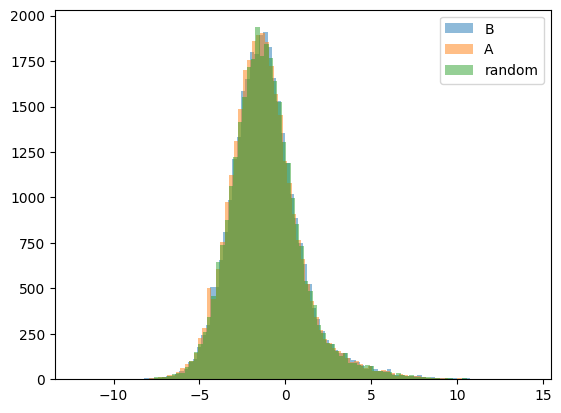

In [20]:
import matplotlib.pyplot as plt

plt.hist(out_1, bins=100, alpha=0.5, label="B");
plt.hist(out_2, bins=100, alpha=0.5, label="A");
plt.hist(out_3, bins=100, alpha=0.5, label="random");

plt.legend();

In [34]:
prompt = """Question: Which of the following is an accurate definition of dynamic scaling in self-similar systems?
Possible answer: Dynamic scaling refers to the non-evolution of self-similar systems, where data obtained from snapshots at fixed times is similar to the respective data taken from snapshots of any earlier or later time. This similarity is tested by a certain time-dependent stochastic variable x.
Analyze whether this is a correct answer. 
Think step-by-step:
Step 1: Read the question carefully and identify the key elements of the question and a possible answer.
Step 2: Think about each of the key elements, writing it out in detail what they are and how they are mutually related.
Step 3: Given what you wrote in step 2, reason about whether the given answer option is correct or not.
Step 4: Review your answers and make sure that you have not missed anything.
Step 5: Provide with the final answer, whether the given answer option is correct or not.
"""

# res = generate_text(prompt)
# print(res[0]["generated_text"])

In [12]:
res = generate_text("again")